In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Algoritma Pencarian Convex Hull

def checkPointPosition(p1, p2, p3):
    '''
        p1, p2, p3 adalah matriks dgn 2 elemen (elemen pertama absis, elemen kedua oordinat)
        Mengembalikan 1 jika titik p3 berada di sebelah
        kiri atau atas garis yg dibentuk oleh p1 dan p2,
        -1 jika di bawahnya, 0 jika tepat pada garis
    '''

    det = (p3[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p3[0] - p1[0])
    if (det > 0): # di sebelah kiri garis
        return 1
    elif (det < 0): # di sebelah kanan garis
        return -1
    else: # tepat pada garis atau det = 0
        return 0

def distanceBetweenLineAndPoint(p1, p2, p3):
    '''
        p1, p2, p3 adalah matriks dgn 2 elemen (elemen pertama absis, elemen kedua oordinat)
        Mengembalikan nilai yg sebanding dgn jarak antara titik p3
        dgn garis yg dibentuk oleh titik p1 dan p2. Pembilang dlm
        rumus asli perhitungan ini diabaikan sehingga yg dihitung hanya
        penyebutnya.
    '''
    return abs((p2[0]-p1[0])*(p1[1]-p3[1])-(p1[0]-p3[0])*(p2[1]-p1[1]))

def getLeftSide(M, p1, p2):
    '''
        Mendapatkan titik2 yang berada di kiri garis
        yg dibentuk oleh p1 dan p2
    '''
    leftSide = []
    for point in M:
        if checkPointPosition(p1,p2,point) == 1: # jika hasil determinan lebih dari nol (fungsi mengembalikan 1)
            leftSide.append(point)
    return leftSide

def getRightSide(M, p1, p2):
    '''
        Mendapatkan titik2 yang berada di kanan garis
        yg dibentuk oleh p1 dan p2
    '''
    rightSide = []
    for point in M:
        if checkPointPosition(p1,p2,point) == -1: # jika hasil determinan kurang dari nol (fungsi mengembalikan -1)
            rightSide.append(point)
    return rightSide

def convexHull(M, p1, p2, points, side):
    '''
        Prosedur rekursif untuk mencari titik2 yg membentuk convex hull
        Menerima masukan array of titik M, titik p1 dan p2 sbg titik ekstrem,
        Titik2 hasil disimpan dalam points, side menentukan bagian yg
        dihitung (bernilai 1 jika sisi kiri atau -1 jika sisi kanan)

    '''
    max = 0
    max_point = [-999,-999]
    for point in M: # pencarian titik dgn jarak terjauh dari garis
        dist = distanceBetweenLineAndPoint(p1, p2, point)
        if (dist > max):
            max = dist
            max_point = point

    if (max == 0): # tidak ditemukan titik lagi 
        points.append(p1)
        points.append(p2)
        return

    # Pembagian titik2 ke dalam dua sisi 
    if side == 1: # sedang melakukan pencarian titik yg berada di kiri (atas) garis
        side1 = getLeftSide(M, p1, max_point)
        side2 = getLeftSide(M, max_point, p2)
    else: # sedang melakukan pencarian titik yg berada di kanan (bawah) garis pq awal
        side1 = getRightSide(M, p1, max_point)
        side2 = getRightSide(M, max_point, p2)

    # rekurens untuk pada dua sisi yang terbentuk akibat pembagian 
    convexHull(side1,p1,max_point,points,side)
    convexHull(side2,max_point,p2,points,side)

def myConvexHull(M):
    '''
        Menerima masukan array of titik yg ingin dicari convex hull-nya. 
        Mengembalikan array of titik yang siap di-plot sbg convex hull dari array of titik M
    '''
    M.sort(key=lambda k: [k[0], k[1]])
    points = []
    leftSide = getLeftSide(M, M[0], M[len(M)-1])
    rightSide = getRightSide(M, M[0], M[len(M)-1])

    # penerapan Divide & Conquer menentukan titik2 pada sisi atas (kiri) atau bawah (kanan)
    convexHull(leftSide, M[0], M[len(M)-1], points, 1) # sisi atas (kiri)
    convexHull(rightSide, M[0], M[len(M)-1], points, -1) # sisi bawah (kanan)
    points.sort(key=lambda k: [k[0], k[1]])

    # Algoritma penyusunan dan pengurutan ulang array of titik hasil convex hull untuk diplot  
    p = points[0]
    q = points[len(points)-1]
    leftSide = getLeftSide(points, p, q) # titik2 yg berada di kiri (atau atas) garis yg dibentuk oleh p dan q
    rightSide = getRightSide(points, p, q) # titik2 yg berada di kanan (atau bawah) garis yg dibentuk oleh p dan q
    rightSide = rightSide + [p, q] # rightSide digabung dengan titik yg membentuk garis pq
    rightSide.sort(key=lambda k: [k[0], k[1]]) # rightSide diurutkan menaik 
    leftSide.sort(key=lambda k: [k[0], k[1]], reverse=True) # leftSide diurutkan menurun
    result = rightSide + leftSide # rightSide dan leftSide digabungkan
    result.append(result[0]) # penambahan dgn elemen pertama untuk kebutuhan plotting
    return result


In [66]:
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


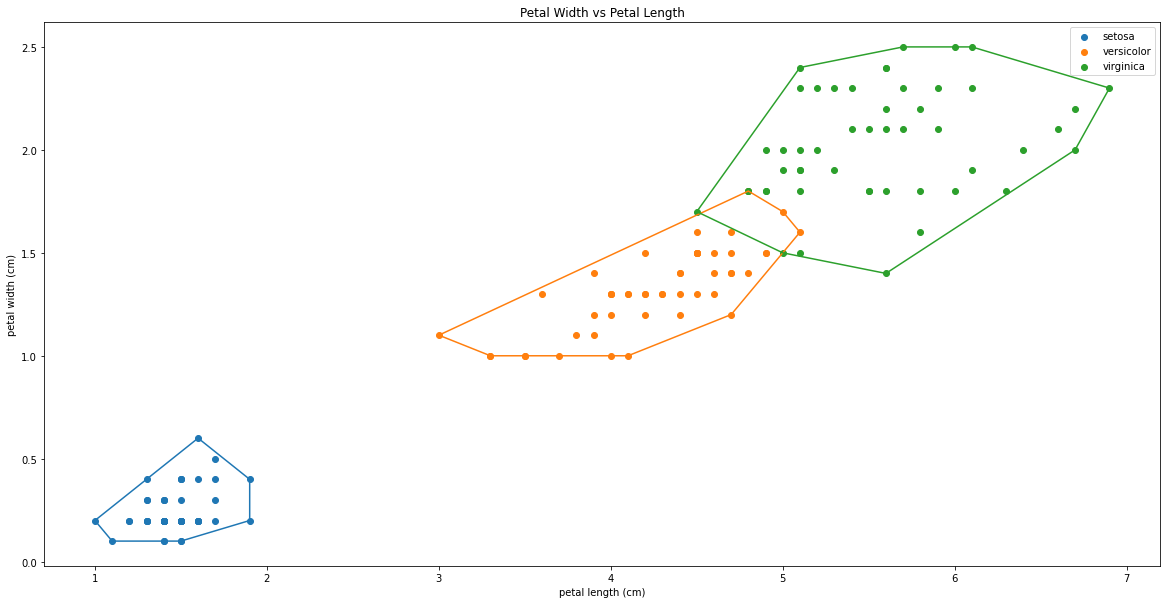

In [67]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Petal Width vs Petal Length')

# set label diagram
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

for i in range(len(data.target_names)): 
    bucket = df[df['Target'] == i] # membagi 3 dataset iris sesuai target (0, 1, 2)
    bucket = bucket.iloc[:,[2,3]].values # mengambil atribut petal width dan petal lalu menjadikannya sbg array 2 dimensi
    hull = myConvexHull(bucket.tolist()) 
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    hull = np.array(hull)
    plt.plot(hull[:,0],hull[:,1])
plt.legend()

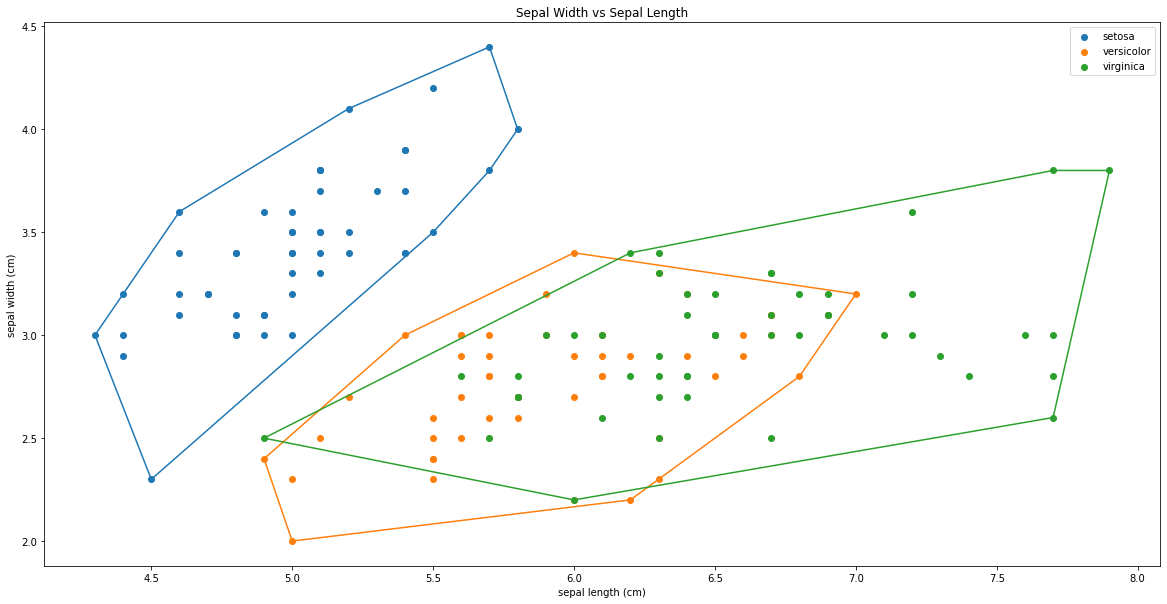

In [68]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Sepal Width vs Sepal Length')

# set label diagram
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)): 
    bucket = df[df['Target'] == i] # membagi 3 dataset iris sesuai target (0, 1, 2)
    bucket = bucket.iloc[:,[0,1]].values # mengambil atribut sepal width dan length lalu menjadikannya sbg array 2 dimensi
    hull = myConvexHull(bucket.tolist()) 
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    hull = np.array(hull)
    plt.plot(hull[:,0],hull[:,1])
plt.legend()

In [69]:
data2 = datasets.load_wine()
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['Target'] = pd.DataFrame(data2.target)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


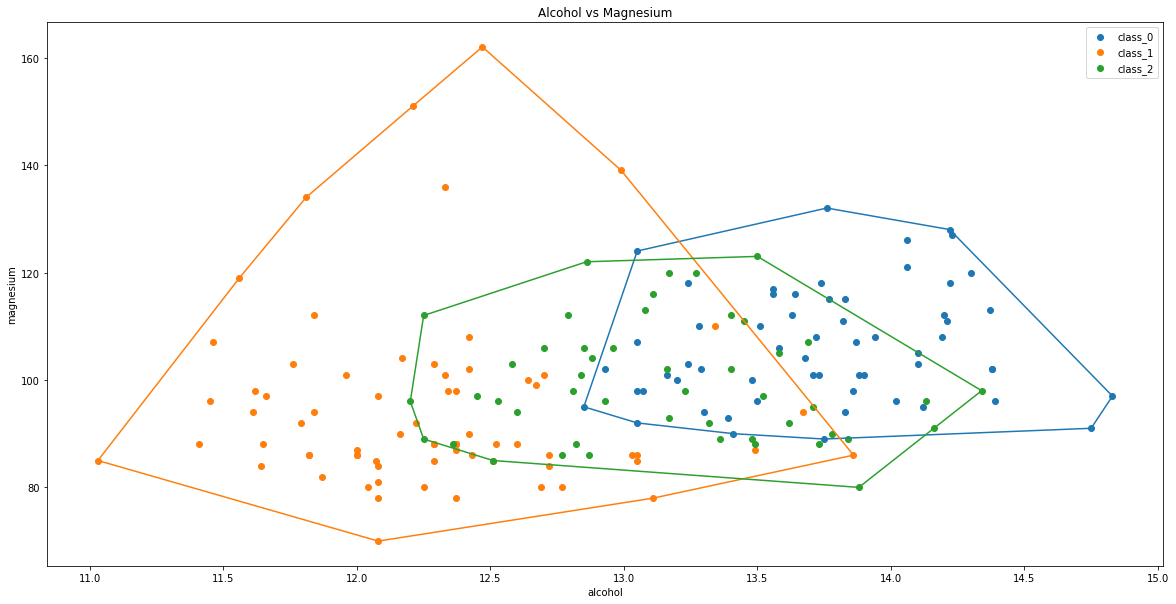

In [70]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Alcohol vs Magnesium')

plt.xlabel(data2.feature_names[0])
plt.ylabel(data2.feature_names[4])

for i in range(len(data2.target_names)): 
    bucket2 = df2[df2['Target'] == i] 
    bucket2 = bucket2.iloc[:,[0,4]].values # mengambil atribut alcohol dan magnesium lalu menjadikannya sbg array 2 dimensi
    hull2 = myConvexHull(bucket2.tolist()) 
    plt.scatter(bucket2[:, 0], bucket2[:, 1], label=data2.target_names[i])
    hull2 = np.array(hull2)
    plt.plot(hull2[:,0],hull2[:,1])
plt.legend()

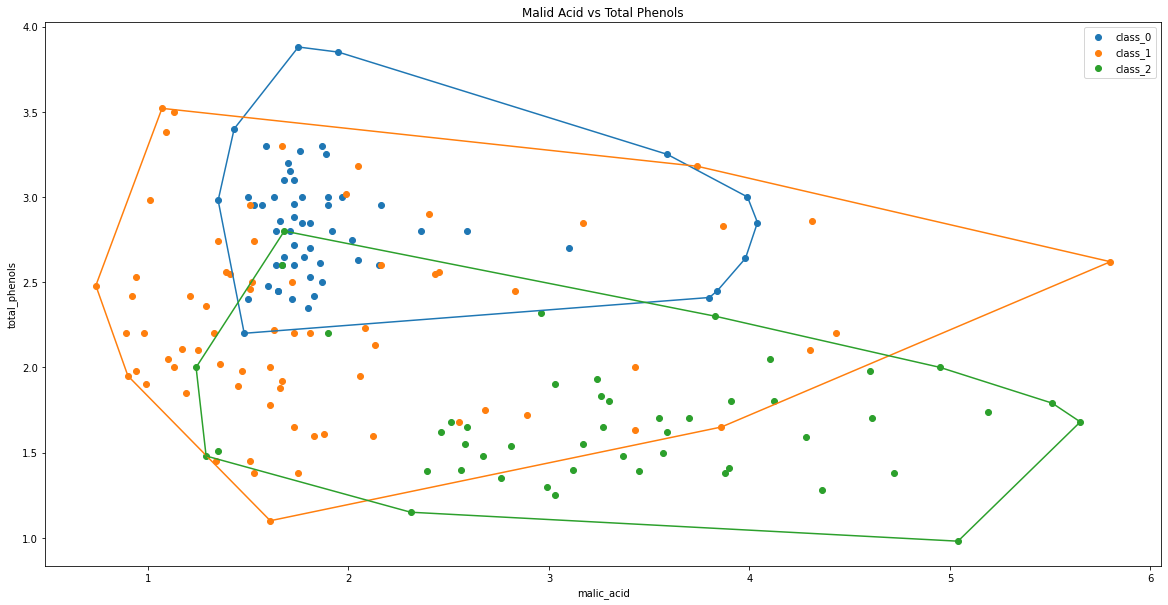

In [71]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Malid Acid vs Total Phenols')

plt.xlabel(data2.feature_names[1])
plt.ylabel(data2.feature_names[5])

for i in range(len(data2.target_names)): 
    bucket2 = df2[df2['Target'] == i] 
    bucket2 = bucket2.iloc[:,[1,5]].values # mengambil atribut malid_acid dan total_phenols lalu menjadikannya sbg array 2 dimensi
    hull2 = myConvexHull(bucket2.tolist()) 
    plt.scatter(bucket2[:, 0], bucket2[:, 1], label=data2.target_names[i])
    hull2 = np.array(hull2)
    plt.plot(hull2[:,0],hull2[:,1])
plt.legend()

In [72]:
data3 = datasets.load_breast_cancer()
df3 = pd.DataFrame(data3.data, columns=data3.feature_names)
df3['Target'] = pd.DataFrame(data3.target)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


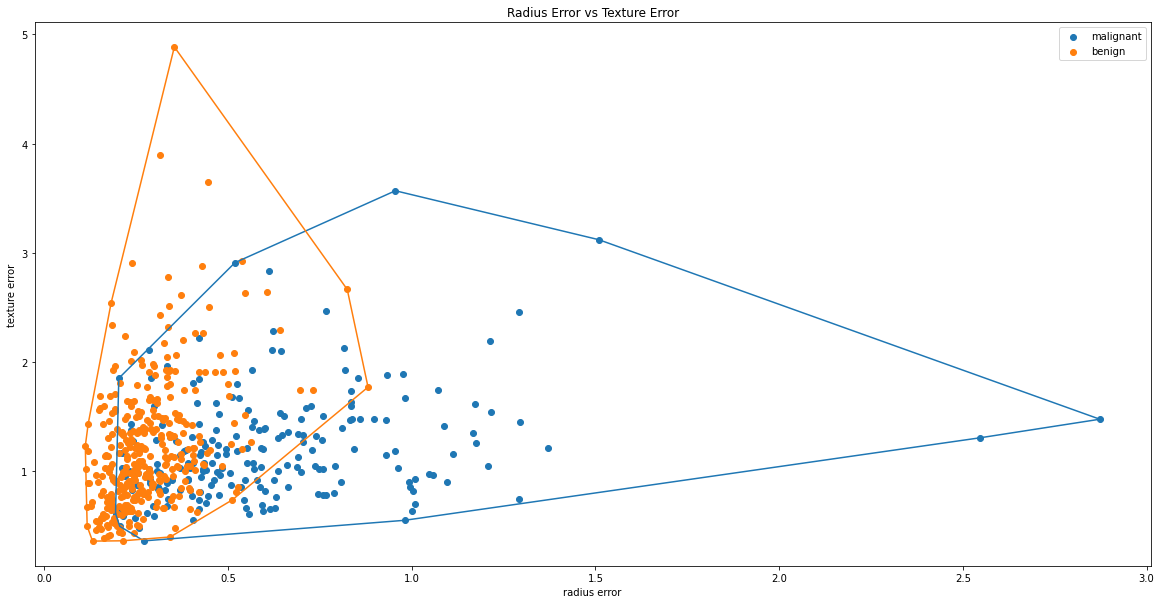

In [73]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Radius Error vs Texture Error')

plt.xlabel(data3.feature_names[10])
plt.ylabel(data3.feature_names[11])

for i in range(len(data3.target_names)): 
    bucket3 = df3[df3['Target'] == i]
    bucket3 = bucket3.iloc[:,[10,11]].values # mengambil atribut radius error dan texture error lalu menjadikannya sbg array 2 dimensi
    hull3 = myConvexHull(bucket3.tolist())
    plt.scatter(bucket3[:, 0], bucket3[:, 1], label=data3.target_names[i])
    hull3 = np.array(hull3)
    plt.plot(hull3[:,0],hull3[:,1])
plt.legend()

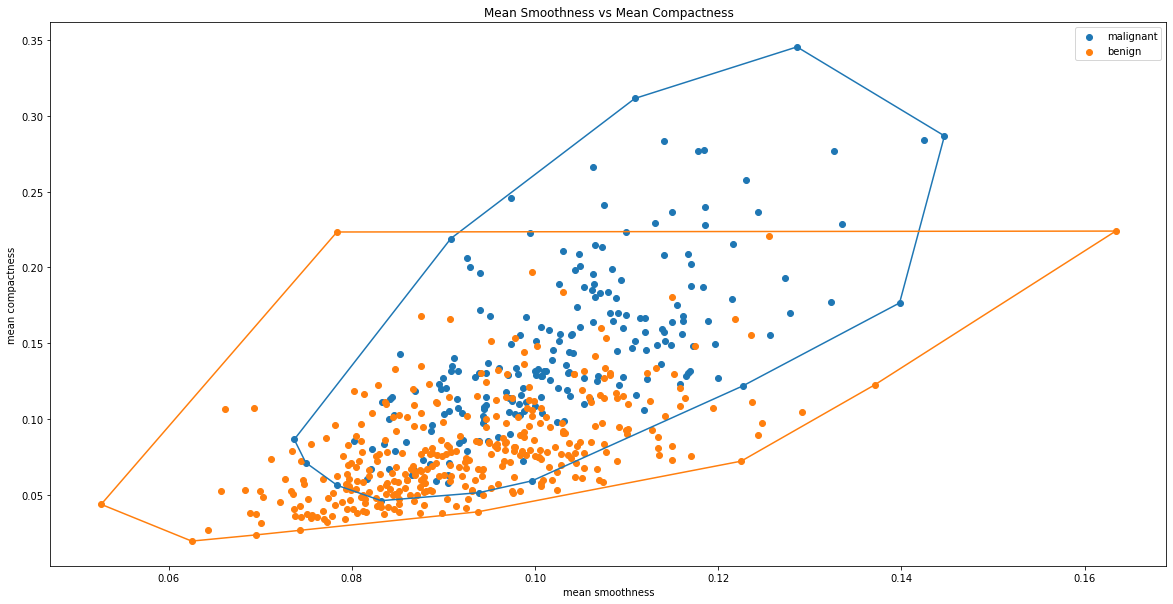

In [74]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Mean Smoothness vs Mean Compactness')

plt.xlabel(data3.feature_names[4])
plt.ylabel(data3.feature_names[5])

for i in range(len(data3.target_names)): 
    bucket3 = df3[df3['Target'] == i]
    bucket3 = bucket3.iloc[:,[4,5]].values # mengambil atribut mean_smoothness dan mean_compactness lalu menjadikannya sbg array 2 dimensi
    hull3 = myConvexHull(bucket3.tolist())
    plt.scatter(bucket3[:, 0], bucket3[:, 1], label=data3.target_names[i])
    hull3 = np.array(hull3)
    plt.plot(hull3[:,0],hull3[:,1])
plt.legend()

In [75]:
data4 = datasets.load_digits()
df4 = pd.DataFrame(data4.data, columns=data4.feature_names)
df4['Target'] = pd.DataFrame(data4.target)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df4.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


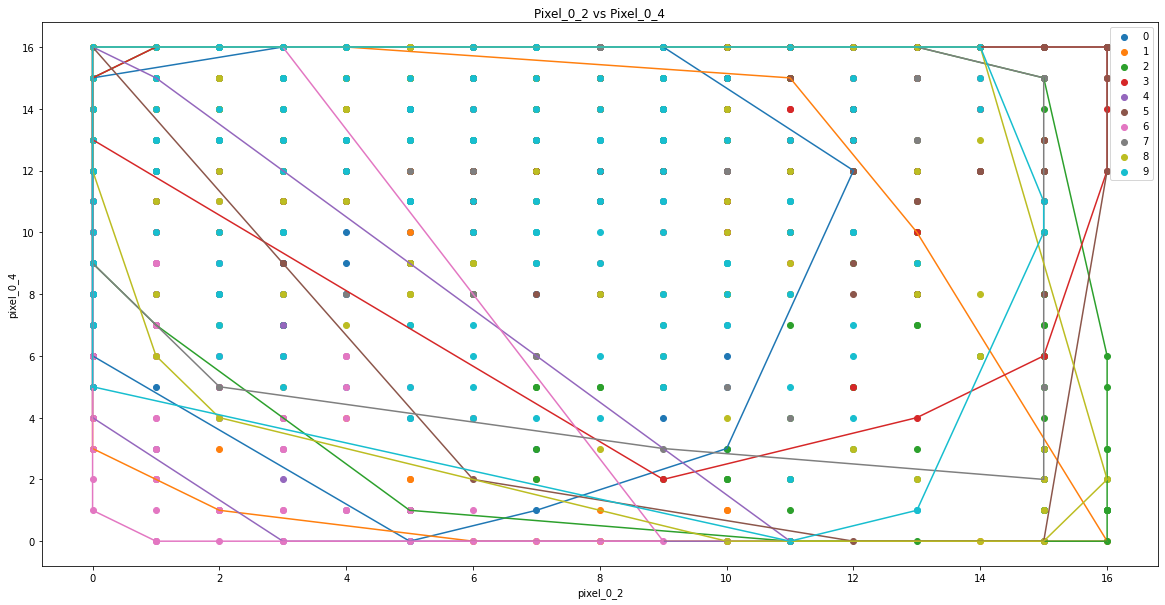

In [76]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Pixel_0_2 vs Pixel_0_4')

plt.xlabel(data4.feature_names[2])
plt.ylabel(data4.feature_names[4])

for i in range(len(data4.target_names)): 
    bucket4 = df4[df4['Target'] == i]
    bucket4 = bucket4.iloc[:,[2,4]].values # mengambil atribut pixel_0_2 dan pixel_0_4 lalu menjadikannya sbg array 2 dimensi
    hull4 = myConvexHull(bucket4.tolist())
    plt.scatter(bucket4[:, 0], bucket4[:, 1], label=data4.target_names[i])
    hull4 = np.array(hull4)
    plt.plot(hull4[:,0],hull4[:,1])
plt.legend()

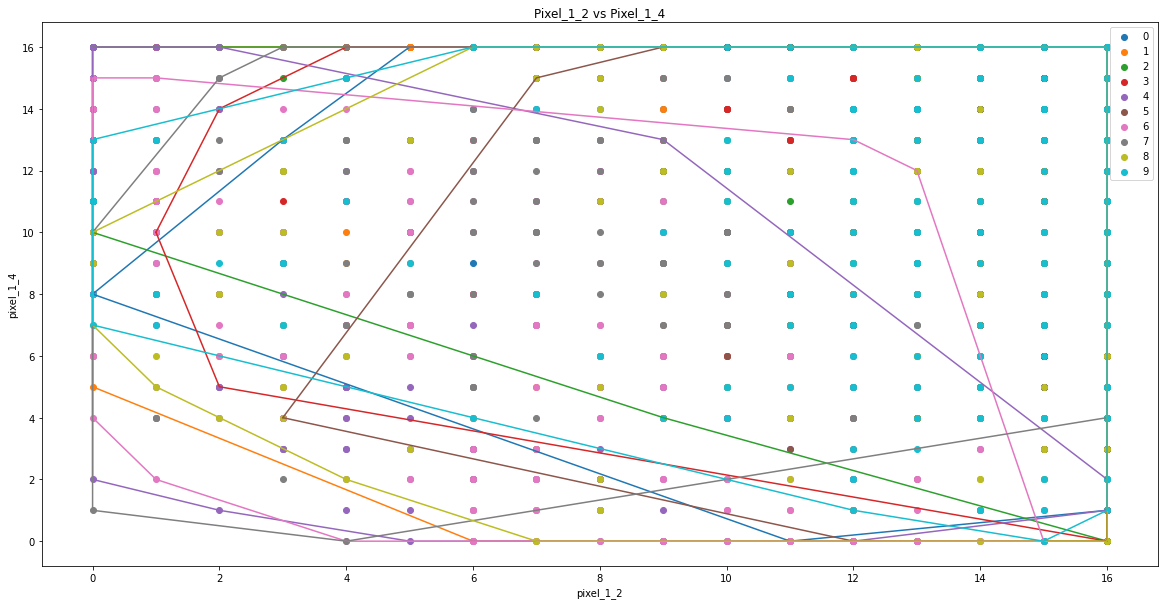

In [77]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.title('Pixel_1_2 vs Pixel_1_4')

plt.xlabel(data4.feature_names[10])
plt.ylabel(data4.feature_names[12])

for i in range(len(data4.target_names)): 
    bucket4 = df4[df4['Target'] == i]
    bucket4 = bucket4.iloc[:,[10,12]].values # mengambil atribut pixel_1_2 dan pixel_1_4 lalu menjadikannya sbg array 2 dimensi
    hull4 = myConvexHull(bucket4.tolist())
    plt.scatter(bucket4[:, 0], bucket4[:, 1], label=data4.target_names[i])
    hull4 = np.array(hull4)
    plt.plot(hull4[:,0],hull4[:,1])
plt.legend()